<a href="https://colab.research.google.com/github/jatin69/mca507-neural-networks/blob/master/Assignment_4_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)







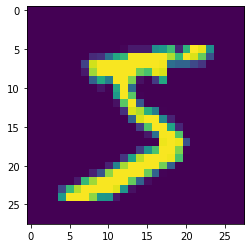

In [2]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape) # 60000 rows of 28x28 pixel images 
print(X_test.shape) # 10000 rows of 28x28 pixel images 

plt.imshow(X_train[0])

# Reshape the data to fit the model
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Converting the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Build the CNN model
model = Sequential()
# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:

#Train the model
#Batch: Total number of training examples present in a single batch (None = default 32)
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
#Fit: Another word for train
model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=4)


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 179s 3ms/step - loss: 10.1949 - acc: 0.3672 - val_loss: 10.1209 - val_acc: 0.3718
Epoch 2/4
60000/60000 [==============================] - 179s 3ms/step - loss: 10.2845 - acc: 0.3617 - val_loss: 10.1285 - val_acc: 0.3715
Epoch 3/4
60000/60000 [==============================] - 178s 3ms/step - loss: 10.1888 - acc: 0.3678 - val_loss: 10.2377 - val_acc: 0.3647
Epoch 4/4
60000/60000 [==============================] - 179s 3ms/step - loss: 10.1565 - acc: 0.3698 - val_loss: 10.2174 - val_acc: 0.3660


[6 8 8 9 9]
[6 0 5 4 9]


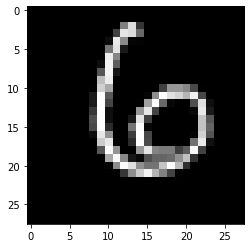

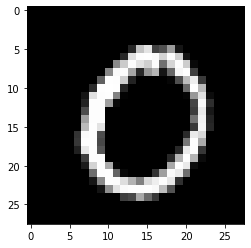

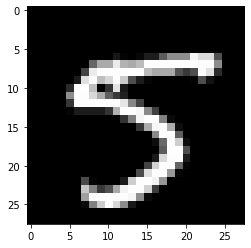

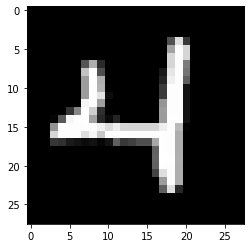

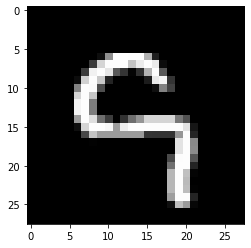

In [5]:

#Show predictions as probabilites for the first 4 images in the test set
predictions = model.predict(X_test[100:105])
predictions

#Print our predicitons as number labels for the first 4 images
print( np.argmax(predictions, axis=1))
#Print the actual labels
print(y_test[100:105])

#Show the first 4 images as pictures
for i in range(100, 105):
  image = X_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()